In [1]:
# DO NOT TOUCH ME
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import pandas
import re
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statistics import mean, median


desiredSpeed = 36  # TODO read from output
arrivalPosition = 100000

## Read trips/emissions

sumo_trips = pandas.read_csv('human-trips.csv')

sumo_trips.rename(columns=lambda x: re.sub('tripinfo_', '', x), inplace=True)
sumo_trips.rename(columns=lambda x: re.sub('emissions_', '', x), inplace=True)

sumo_trips.replace(r'static\.', '', regex=True, inplace=True)
sumo_trips.replace('edge_0_0_', '', regex=True, inplace=True)

sumo_trips = sumo_trips.astype({'arrivalLane': int, 'departLane': int, 'id': int, 'vType': str})

sumo_trips.sort_values(by='id', inplace=True)

plafosim_trips = pandas.read_csv('human_vehicle_trips.csv')
plafosim_trips.sort_values(by='id', inplace=True)

plafosim_emissions = pandas.read_csv('human_vehicle_emissions.csv')
plafosim_emissions.sort_values(by='id', inplace=True)

ids = frozenset(sumo_trips['id'].unique()).intersection(plafosim_trips['id'].unique())

## Read traces

sumo_traces = pandas.read_csv('human-traces.csv', usecols=['timestep_time', 'vehicle_id', 'vehicle_lane', 'vehicle_pos', 'vehicle_speed'])
sumo_traces.columns = ['step', 'id', 'lane', 'position', 'speed']

sumo_traces.dropna(inplace=True)

sumo_traces.replace(r'static\.', '', regex=True, inplace=True)
sumo_traces.replace('edge_0_0_', '', regex=True, inplace=True)

sumo_traces = sumo_traces.astype({'step': int, 'id': int, 'lane': int})

sumo_traces.sort_values(by='step', inplace=True)

plafosim_traces = pandas.read_csv('human_vehicle_traces.csv', usecols=['step', 'id', 'position', 'lane', 'speed'])
plafosim_traces.sort_values(by='step', inplace=True)

## Read lane-changes

sumo_changes = pandas.read_csv('human-changes.csv', usecols=['change_from', 'change_id', 'change_pos', 'change_reason', 'change_speed', 'change_time', 'change_to'])
sumo_changes.columns = ['from', 'id', 'position', 'reason', 'speed', 'step', 'to']

sumo_changes.dropna(inplace=True)

sumo_changes.replace(r'static\.', '', regex=True, inplace=True)
sumo_changes.replace('edge_0_0_', '', regex=True, inplace=True)

sumo_changes = sumo_changes.astype({'step': int, 'id': int, 'from': int, 'to': int})

sumo_changes.sort_values(by='step', inplace=True)

plafosim_changes = pandas.read_csv('human_vehicle_changes.csv')
plafosim_changes.sort_values(by='step', inplace=True)

In /home/heinovski/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/heinovski/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/heinovski/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/heinovski/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/heinovski/.local/lib/python3.6/site-packages/matplo

Evaluating runtime...
Plotting runtime...


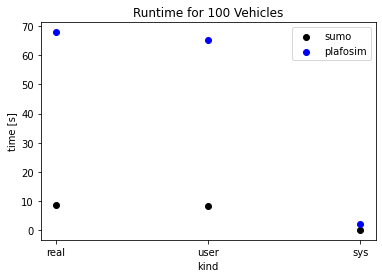

In [2]:
## Evalute runtime

print("Evaluating runtime...")

runtimes = pandas.read_csv('runtimes_human.csv')
runtimes = runtimes.astype({'simulator': str})

print("Plotting runtime...")

plt.figure()
plt.title("Runtime for %d Vehicles" % len(ids))
data = runtimes.loc[runtimes.simulator == "sumo", runtimes.columns != "simulator"].values.flatten()

plt.scatter(range(0, len(data), 1), data, label="sumo", color="black")
data = runtimes.loc[runtimes.simulator == "plafosim", runtimes.columns != "simulator"].values.flatten()
plt.scatter(range(0, len(data), 1), data, label="plafosim", color="blue")

plt.ylabel("time [s]")
plt.xticks(range(0, len(data), 1), runtimes.loc[:, runtimes.columns != "simulator"])
plt.xlabel("kind")
plt.legend()
plt.savefig('runtime.png')

In [3]:
runtimes

,simulator,real,user,sys
0,plafosim,67.84,65.11,2.00
1,sumo,8.58,8.17,0.14


In [5]:
ru = runtimes.melt('simulator')
ru

,simulator,variable,value
0,plafosim,real,67.84
1,sumo,real,8.58
2,plafosim,user,65.11
3,sumo,user,8.17
4,plafosim,sys,2.00
5,sumo,sys,0.14


<AxesSubplot:xlabel='variable', ylabel='value'>

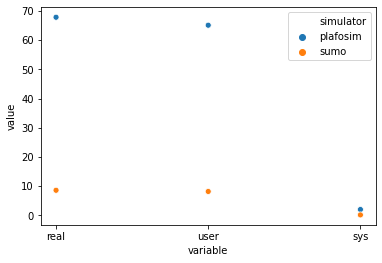

In [6]:
sns.scatterplot(
    data=ru,
    x='variable',
    y='value',
    hue='simulator'
)

In [7]:
sumo_trips.info()
sumo_trips.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 11 to 32
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arrival          100 non-null    float64
 1   arrivalLane      100 non-null    int64  
 2   arrivalPos       100 non-null    float64
 3   arrivalSpeed     100 non-null    float64
 4   depart           100 non-null    float64
 5   departDelay      100 non-null    float64
 6   departLane       100 non-null    int64  
 7   departPos        100 non-null    float64
 8   departSpeed      100 non-null    float64
 9   devices          100 non-null    object 
 10  duration         100 non-null    float64
 11  id               100 non-null    int64  
 12  rerouteNo        100 non-null    int64  
 13  routeLength      100 non-null    float64
 14  speedFactor      100 non-null    float64
 15  stopTime         100 non-null    float64
 16  timeLoss         100 non-null    float64
 17  vType           

,arrival,arrivalLane,arrivalPos,arrivalSpeed,depart,departDelay,departLane,departPos,departSpeed,devices,...,vaporized,waitingCount,waitingTime,CO2_abs,CO_abs,HC_abs,NOx_abs,PMx_abs,electricity_abs,fuel_abs
11,2666.0,0,100000.0,37.22,0.0,0.0,0,4.1,0.0,tripinfo_0 emissions_0 fcd_0,...,NaN,0,0.0,1.765495e+07,416608.728346,2359.682844,7085.513382,483.680901,0,7589.097630
52,3019.0,0,100000.0,33.12,3.0,0.0,0,4.1,0.0,tripinfo_1 emissions_1 fcd_1,...,NaN,0,0.0,1.648012e+07,319194.734813,1879.273736,6479.516576,416.349064,0,7084.074882
23,2807.0,0,100000.0,35.51,6.0,0.0,0,4.1,0.0,tripinfo_2 emissions_2 fcd_2,...,NaN,0,0.0,1.705372e+07,373596.402373,2145.693830,6785.187028,452.924297,0,7330.648049
8,2620.0,0,100000.0,38.00,9.0,0.0,0,4.1,0.0,tripinfo_3 emissions_3 fcd_3,...,NaN,0,0.0,1.790137e+07,435682.741820,2454.333412,7192.025118,496.833492,0,7695.031497
20,2756.0,0,100000.0,36.17,12.0,0.0,0,4.1,0.0,tripinfo_4 emissions_4 fcd_4,...,NaN,0,0.0,1.736736e+07,392316.604366,2239.898169,6948.901359,467.232329,0,7465.471965


In [8]:
plafosim_trips.info()
plafosim_trips.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 24 to 81
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   depart        100 non-null    int64  
 2   departLane    100 non-null    int64  
 3   departPos     100 non-null    int64  
 4   departSpeed   100 non-null    float64
 5   arrival       100 non-null    int64  
 6   arrivalLane   100 non-null    int64  
 7   arrivalPos    100 non-null    float64
 8   arrivalSpeed  100 non-null    float64
 9   duration      100 non-null    int64  
 10  routeLength   100 non-null    float64
 11  timeLoss      100 non-null    float64
 12  desiredSpeed  100 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 10.9 KB


,id,depart,departLane,departPos,departSpeed,arrival,arrivalLane,arrivalPos,arrivalSpeed,duration,routeLength,timeLoss,desiredSpeed
24,0,0,0,4,0.0,2741,0,100000.0,36.570440,2741,99996.0,7.0,36.570440
72,1,3,0,4,0.0,3100,0,100000.0,32.340996,3097,99996.0,5.0,32.340996
66,2,6,0,4,0.0,3067,0,100000.0,32.729122,3061,99996.0,6.0,32.729122
16,3,9,0,4,0.0,2651,0,100000.0,37.953213,2642,99996.0,7.0,37.953213
47,4,12,0,4,0.0,2896,0,100000.0,34.748985,2884,99996.0,6.0,34.748985


In [12]:
(sumo_trips.set_index('id').depart == plafosim_trips.set_index('id').depart).all()

True

In [13]:
# destroy the data
#sumo_trips = sumo_trips.assign(depart = lambda x: x.depart.mask(x['id'] == 0, 2), departLane = lambda x: x.departLane.mask(x['id'] == 2, 2))
sumo_trips.head()

,arrival,arrivalLane,arrivalPos,arrivalSpeed,depart,departDelay,departLane,departPos,departSpeed,devices,...,vaporized,waitingCount,waitingTime,CO2_abs,CO_abs,HC_abs,NOx_abs,PMx_abs,electricity_abs,fuel_abs
11,2666.0,0,100000.0,37.22,0.0,0.0,0,4.1,0.0,tripinfo_0 emissions_0 fcd_0,...,NaN,0,0.0,1.765495e+07,416608.728346,2359.682844,7085.513382,483.680901,0,7589.097630
52,3019.0,0,100000.0,33.12,3.0,0.0,0,4.1,0.0,tripinfo_1 emissions_1 fcd_1,...,NaN,0,0.0,1.648012e+07,319194.734813,1879.273736,6479.516576,416.349064,0,7084.074882
23,2807.0,0,100000.0,35.51,6.0,0.0,0,4.1,0.0,tripinfo_2 emissions_2 fcd_2,...,NaN,0,0.0,1.705372e+07,373596.402373,2145.693830,6785.187028,452.924297,0,7330.648049
8,2620.0,0,100000.0,38.00,9.0,0.0,0,4.1,0.0,tripinfo_3 emissions_3 fcd_3,...,NaN,0,0.0,1.790137e+07,435682.741820,2454.333412,7192.025118,496.833492,0,7695.031497
20,2756.0,0,100000.0,36.17,12.0,0.0,0,4.1,0.0,tripinfo_4 emissions_4 fcd_4,...,NaN,0,0.0,1.736736e+07,392316.604366,2239.898169,6948.901359,467.232329,0,7465.471965


In [14]:
s = sumo_trips.set_index('id')
p = plafosim_trips.set_index('id')

In [15]:
# it does not work for departPos, routeLength (0.1m)
labels = ['depart', 'departPos', 'departLane', 'departSpeed', 'arrivalPos', 'routeLength']
#abs(p[labels] - s[labels])

In [16]:
# FIXME HACK for departPos and routeLength
trip_equality = abs(p[labels] - s[labels]) <= 0.11  # this solves the float problematic
#trip_equality

In [17]:
#assert(trip_equality.all().all())

In [18]:
#trip_equality.mask(trip_equality).dropna(how='all', axis='columns')

In [19]:
# this is a list of broken entries for equality in trips
foo = trip_equality.mask(trip_equality).reset_index().melt('id').dropna()[['id', 'variable']]
#foo

In [20]:
if not foo.empty:
    print("something went wrong!")
    # TODO check foo's content

In [ ]:
# this is the diffs (first part of script)
labels2 = ['arrival', 'arrivalLane'] # etc.
diffs_trips = p[labels2] - s[labels2]
diffs_trips['arrival'].describe() # can be used for plotting

In [22]:
sumo_traces.groupby('id').step.min()
# TODO add assert for depart time

id
0       0
1       3
2       6
3       9
4      12
     ... 
95    285
96    288
97    291
98    294
99    297
Name: step, Length: 100, dtype: int64

In [23]:
sumo_traces.groupby('id').step.max()
# TODO add assert for arrival time

id
0     2665
1     3018
2     2806
3     2619
4     2755
      ... 
95    2962
96    3092
97    3416
98    2816
99    2875
Name: step, Length: 100, dtype: int64

In [25]:
s2 = sumo_traces.set_index(['id', 'step'], drop=False)
p2 = plafosim_traces.set_index(['id', 'step'], drop=False)

In [27]:
s2 = s2.assign(lifetime = lambda x: x.step - x.groupby(level='id').step.min(), diff_desired = lambda x: x.speed - s.speedFactor * 36).reset_index(drop=True)
p2 = p2.assign(lifetime = lambda x: x.step - x.groupby(level='id').step.min(), diff_desired = lambda x: x.speed - p.desiredSpeed, diff_sumo_speed = lambda x: x.speed - s2.set_index(['id', 'step']).speed, diff_sumo_position = lambda x: x.position - s2.set_index(['id', 'step']).position, diff_sumo_lane = lambda x: abs(x.lane - s2.set_index(['id', 'step']).lane)).reset_index(drop=True)

In [28]:
s2 = s2.set_index(['id', 'lifetime']).sort_index()
p2 = p2.set_index(['id', 'lifetime']).sort_index()

In [29]:
labels3 = ['speed', 'position']
s2[labels3].groupby('id')

In [32]:
merged = pandas.concat([s2, p2], keys=['sumo', 'plafosim'], names=['simulator']).reset_index()
merged

,simulator,id,lifetime,step,lane,position,speed,diff_desired,diff_sumo_speed,diff_sumo_position,diff_sumo_lane
0,sumo,0,0,0,0,4.100000,0.000000,-38.16,NaN,NaN,NaN
1,sumo,0,1,1,0,4.790000,1.390000,-36.77,NaN,NaN,NaN
2,sumo,0,2,2,0,6.980000,3.000000,-35.16,NaN,NaN,NaN
3,sumo,0,3,3,0,11.200000,5.440000,-32.72,NaN,NaN,NaN
4,sumo,0,4,4,0,17.580000,7.320000,-30.84,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
563453,plafosim,99,2856,3153,0,99858.824554,35.051755,0.00,NaN,NaN,NaN
563454,plafosim,99,2857,3154,0,99893.876309,35.051755,0.00,NaN,NaN,NaN
563455,plafosim,99,2858,3155,0,99928.928064,35.051755,0.00,NaN,NaN,NaN
563456,plafosim,99,2859,3156,0,99963.979820,35.051755,0.00,NaN,NaN,NaN


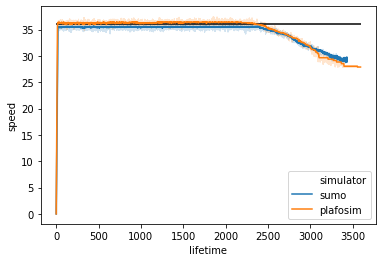

In [33]:
fig, ax = plt.subplots()
# TODO check ci or disable bootstrapping
sns.lineplot(
    data=merged,
    x='lifetime',
    y='speed',
    estimator='mean',
    n_boot=1,
    hue='simulator',
    ax = ax
)
ax.hlines(36, 0, merged.lifetime.max(), color='black', label='desired')
fig.savefig('foo.pdf')

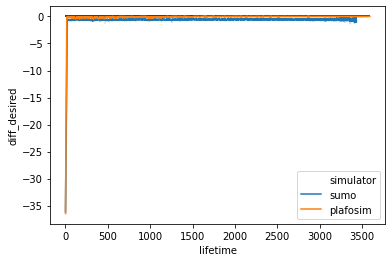

In [34]:
fig, ax = plt.subplots()
sns.lineplot(
    data=merged,
    x='lifetime',
    y='diff_desired',
    estimator='mean',
    n_boot=1,
    hue='simulator',
    ax = ax
)
ax.hlines(0, 0, merged.lifetime.max(), color='black', label='desired')
fig.savefig('bar.pdf')

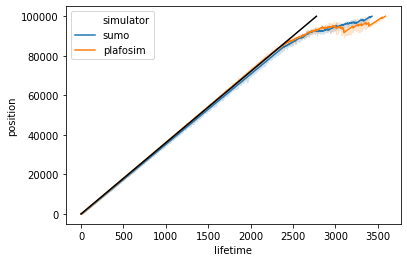

In [35]:
fig, ax = plt.subplots()
sns.lineplot(
    data=merged,
    x='lifetime',
    y='position',
    estimator='mean',
    n_boot=1,
    hue='simulator',
    ax = ax
)
sns.lineplot(
    x=range(0, merged.lifetime.max()),
    y=[step * 36 if step <= 100000/36 else None for step in range(0, merged.lifetime.max())],
    color='black',
    ax = ax
)
fig.savefig('foobar.pdf')

<AxesSubplot:xlabel='lifetime', ylabel='diff_sumo_speed'>

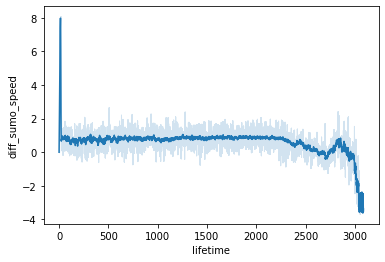

In [36]:
sns.lineplot(
    data=merged,
    x='lifetime',
    y='diff_sumo_speed',
    estimator='mean',
    n_boot=1
)

<AxesSubplot:xlabel='lifetime', ylabel='diff_sumo_position'>

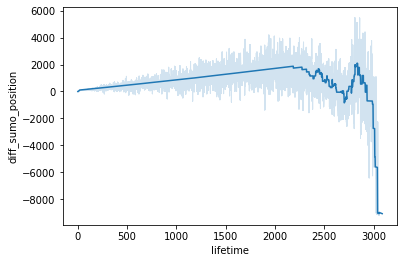

In [37]:
sns.lineplot(
    data=merged,
    x='lifetime',
    y='diff_sumo_position',
    estimator='mean',
    n_boot=1
)

<AxesSubplot:xlabel='lifetime', ylabel='diff_sumo_lane'>

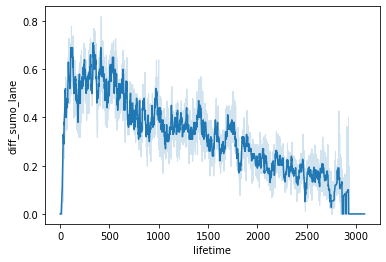

In [38]:
sns.lineplot(
    data=merged,
    x='lifetime',
    y='diff_sumo_lane',
    estimator='mean',
    n_boot=1
)